In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



In [2]:
# El set de datos a utilizar contiene una muestra de 29 datos, donde se muestra la edad y su presión arterial, con 
# la finalidad de obtener un modelo que dada una edad, pronóstique la magnitud de presión arterial asociada.

datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
print(datos)

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


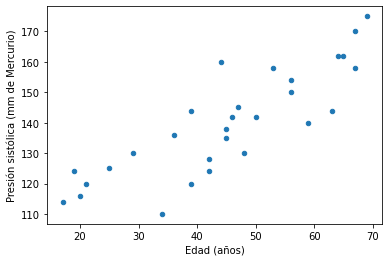

In [3]:
# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

In [4]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [5]:
#configuración para que los resultados sean iguales en cualquier computador.
np.random.seed(2)

#Etapa de Forward propagation.

#la función add: adhiere una capa de computo agregando la funcion dense, donde se especifican las dimensiones
#de los datos de entrada y salida, además de la función de activación que transformará los datos.

#Etapa de Forward propagation.

input_dim = 1
output_dim = 1
modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))


In [6]:
#Etapa de  Backward propagation.

#El modelo se configura utilizando un compilador, el método compile utiliza sobre el modelo un optimizador que 
# minimiza el error, en este caso, en la función lineal. 

#Se selecciono como optimizador el SGD: Gradiente Descendiente, que tiene por parametro el learning rate o tasa de aprendizaje.
sgd = SGD(lr=0.0004)
modelo.compile(loss='mse', optimizer=sgd)

#la función de perdida a minimizar será la del error cuadratico medio (mse: Mean square error.).

In [7]:
# Resumen del modelo (solo existe una capa con dos parametros: w y b)
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Creado el modelo, procederemos a entrenar los datos indicando el numero de epocas o iteraciones y el tamaño de batch,
# que representa la cantidad de datos que trabajará en cada iteración.

num_epochs = 40000
batch_size = 29
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)


In [9]:
#Obtención de parámetros, luego del entrenamiento.

capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

#w= array([[1.692396]], dtype=float32) ; w[0][0] = 1.0
#b= array([0.], dtype=float32) ; b[0] = 93.5. 

Parámetros: w = 1.0, b = 93.5


Text(0.5, 1.0, 'MSE vs. epochs')

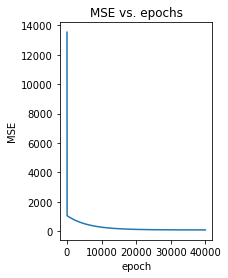

In [10]:
# Comparamos el error vs epochs y el resultado de la regresión

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE vs. epochs')

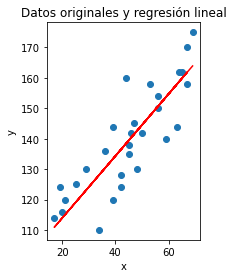

In [11]:
#Graficamos modelo inicial vs pronostico.
y_obj = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_obj,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

In [12]:
# Predicción
x_pred = np.array([33])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

La presión sanguínea será de 127.2 mm-Hg  para una persona de 33 años
